## Análise Exploratória dos Fatores Associados à Obesidade: Um Estudo Baseado em Dados de Saúde Pública

### Importando as bibliotecas

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from IPython.display import display, Markdown
from IPython.display import Image, display
from IPython.display import HTML, Image

## 1. Coleta dos dados

In [12]:
df = pd.read_csv("../kaggle/ObesityDataSet_raw_and_data_sinthetic.csv")
display(df)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 2. Descrição dos dados

In [13]:
imagem = f'<div style="text-align:center;"><img src="../images/bodymassindex.png" width="800" height="600"></div>'
display(HTML(imagem))

#### Conjunto de Dados "Obesity Levels"

O conjunto de dados "Obesity Levels" contém informações sobre características demográficas, hábitos alimentares, histórico familiar e níveis de atividade física de indivíduos, com foco na classificação do nível de obesidade. Estes dados são essenciais para compreender os principais fatores associados à obesidade e amplamente utilizados em tarefas de aprendizado de máquina. A riqueza dessas informações permite investigar diversas hipóteses sobre as relações entre os diferentes atributos e o nível de obesidade, contribuindo para o desenvolvimento de estratégias mais eficazes de prevenção e manejo desta condição crônica de saúde pública.

### 2.1. Distribuição dos dados

In [14]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,1401,1866,NaN,NaN,2015,2067,NaN,1726,NaN,NaN,1765,1580,351
mean,24.312600,NaN,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,6.345968,NaN,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.947192,NaN,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,22.777890,NaN,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,26.000000,NaN,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


### 2.2. Dicionário de dados

In [15]:
dicionario = pd.DataFrame([
    {
        "variavel": "Age",
        "descricao": "Idade do indíviduo",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Gender",
        "descricao": "Gênero do indíviduo (male/female)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Height",
        "descricao": "Altura do indíviduo (em metros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Weight",
        "descricao": "Peso do indíviduo (em quilogramas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CALC",
        "descricao": "Frequência do consumo de álcool do indíviduo",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAVC",
        "descricao": "Frequência do consumo de alimentos com alto índice calórico",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FCVC",
        "descricao": "Frequencia do consumo de vegetais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "NCP",
        "descricao": "Número de refeições principais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "SCC",
        "descricao": "Se o indivíduo realiza monitoração das calorias consumidas diariamentes",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "SMOKE",
        "descricao": "Se o indivíduo é fumante",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "CH2O",
        "descricao": "Consumo de água do indivíduo (em litros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "family_history_with_overweight",
        "descricao": "Histórico familiar de sobrepeso",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAF",
        "descricao": "Tempo gasto em atividades físicas (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "TUE",
        "descricao": "Tempo gasto em dispositivos tecnológicos, como celulares e outros (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CAEC",
        "descricao": "Consumo de comida entre as refeições (café da manhã, almoço, jantar)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "MTRANS",
        "descricao": "Meio de transporte usado regularmente",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "NObeyesdad",
        "descricao": "Classificação de obesidade",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    }
])

dicionario.to_csv('../data/external/dictionary.csv', index=False)

### Variáveis do Conjunto de Dados:

1. **Age (Idade)**: Representa a idade do indivíduo em anos. Esta variável é quantitativa e contínua.

2. **Gender (Gênero)**: Indica o gênero do indivíduo (masculino/feminino). Esta variável é qualitativa e nominal.

3. **Height (Altura)**: Refere-se à altura do indivíduo em metros. Esta variável é quantitativa e contínua.

4. **Weight (Peso)**: Indica o peso do indivíduo em quilogramas. Esta variável é quantitativa e contínua.

5. **CALC (Consumo de Álcool)**: Representa a frequência do consumo de álcool pelo indivíduo. Esta variável é qualitativa e nominal.

6. **FAVC (Consumo de Alimentos Calóricos)**: Indica a frequência do consumo de alimentos com alto teor calórico pelo indivíduo. Esta variável é qualitativa e nominal.

7. **FCVC (Consumo de Vegetais)**: Refere-se à frequência do consumo de vegetais pelo indivíduo. Esta variável é quantitativa e discreta.

8. **NCP (Número de Refeições Principais)**: Indica o número de refeições principais do indivíduo por dia. Esta variável é quantitativa e discreta.

9. **SCC (Monitoramento de Calorias Consumidas)**: Indica se o indivíduo realiza monitoramento das calorias consumidas diariamente. Esta variável é qualitativa e nominal.

10. **SMOKE (Hábito de Fumar)**: Indica se o indivíduo é fumante. Esta variável é qualitativa e nominal.

11. **CH2O (Consumo de Água)**: Representa o consumo de água do indivíduo em litros. Esta variável é quantitativa e contínua.

12. **Family_history_with_overweight (Histórico Familiar de Sobrepeso)**: Indica se o indivíduo possui histórico familiar de sobrepeso. Esta variável é qualitativa e nominal.

13. **FAF (Atividade Física)**: Refere-se ao tempo gasto em atividades físicas pelo indivíduo em horas. Esta variável é quantitativa e contínua.

14. **TUE (Tempo de Uso de Tecnologia)**: Indica o tempo gasto em dispositivos tecnológicos, como celulares, em horas. Esta variável é quantitativa e contínua.

15. **CAEC (Consumo de Comida entre Refeições)**: Representa o consumo de comida entre as refeições (café da manhã, almoço, jantar) pelo indivíduo. Esta variável é qualitativa e nominal.

16. **MTRANS (Meio de Transporte)**: Indica o meio de transporte usado regularmente pelo indivíduo. Esta variável é qualitativa e nominal.

17. **NObeyesdad (Classificação de Obesidade)**: Refere-se à classificação de obesidade do indivíduo. Esta variável é qualitativa e ordinal.

## 3. Perguntas de partida e hipóteses


   ##### 3.1. Correlação entre a idade e nível de obesidade
   ##### 3.2. Diferença do gênero na prevalência da obesidade
   ##### 3.3. Impacto do consumo do álcool e tabagismo na obesidade
   ##### 3.4. Relação entre a altura, o peso e o nível de obesidade
   ##### 3.5. Influência do histórico familiar na obesidade
   ##### 3.6. Associação entre hábitos alimentares e obesidade
   ##### 3.7. Correlação entre atividade física e obesidade
   ##### 3.8. Correlação entre o tempo gasto em dispositivos tecnológicos e obesidade

### 3.1 Correlação entre a idade e o nível de obesidade

O objetivo desta análise é investigar a correlação entre a idade dos indivíduos e os diferentes níveis de obesidade observados na população. Compreender essa relação entre a idade e a prevalência dos diversos graus de obesidade é essencial para identificar os grupos etários mais vulneráveis e direcionar estratégias de prevenção e tratamento de forma mais eficaz, promovendo a saúde da população de maneira mais assertiva.

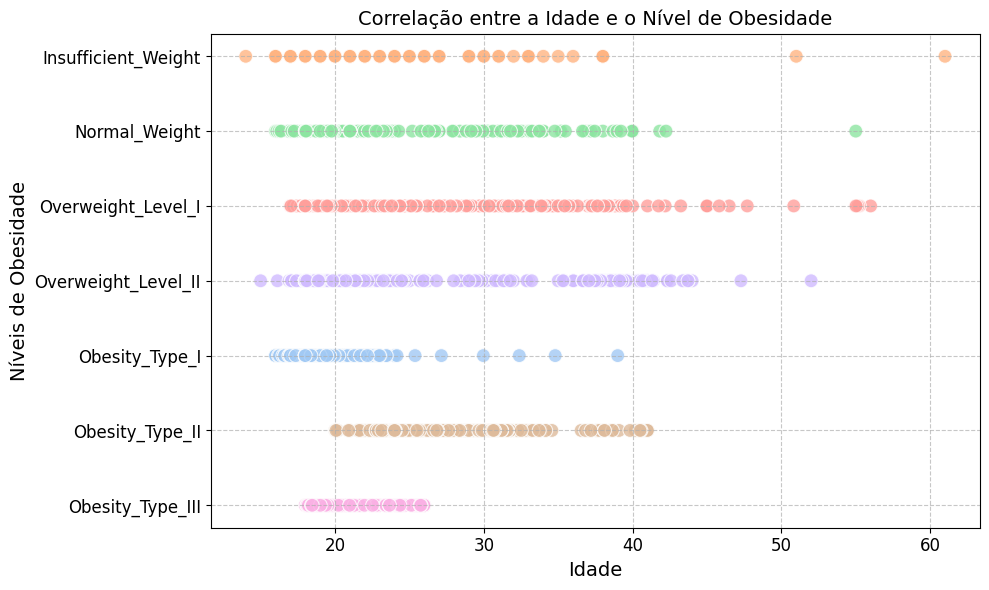

In [24]:
categorias = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cores = sns.color_palette("pastel", len(categorias))

estilo_grafico = {
    'figure_size': (10, 6),
    'title_size': 14,
    'axis_label_size': 14,
    'tick_label_size': 12,
    'grid_style': {'linestyle': '--', 'alpha': 0.7}
}

def plot_age_obesity_correlation(df):
    plt.figure(figsize=estilo_grafico['figure_size'])
    sns.scatterplot(data=df, x='Age', y='NObeyesdad', hue='NObeyesdad', hue_order=categorias, palette=cores, s=100, alpha=0.8, legend=False)    
    plt.title('Correlação entre a Idade e o Nível de Obesidade', fontsize=estilo_grafico['title_size'])
    plt.xlabel('Idade', fontsize=estilo_grafico['axis_label_size'])
    plt.ylabel('Níveis de Obesidade', fontsize=estilo_grafico['axis_label_size'])
    plt.yticks(ticks=range(len(categorias)), labels=categorias, fontsize=estilo_grafico['tick_label_size'])
    plt.xticks(fontsize=estilo_grafico['tick_label_size'])
    plt.grid(True, linestyle=estilo_grafico['grid_style']['linestyle'], alpha=estilo_grafico['grid_style']['alpha'])
    plt.tight_layout()
    plt.show()

plot_age_obesity_correlation(df)

In [19]:
ordem_faixa_etaria = ['18-30', '31-40', '41-50', '50+']
ordem_obesidade = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

def display_obesity_by_age_group(df):
    faixas_etarias = pd.cut(df['Age'], bins=[18, 30, 40, 50, np.inf], labels=ordem_faixa_etaria)
    contagem_obesidade_por_faixa_etaria = df.groupby([faixas_etarias, 'NObeyesdad'])['NObeyesdad'].count().unstack()
    contagem_obesidade_por_faixa_etaria = contagem_obesidade_por_faixa_etaria.reindex(index=ordem_faixa_etaria, columns=ordem_obesidade)
    display(contagem_obesidade_por_faixa_etaria)

display_obesity_by_age_group(df)

NObeyesdad,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
Age,,,,,,,
18-30,189,201,216,172,226,187,323
31-40,3,16,40,80,62,98,0
41-50,0,0,2,10,23,12,0
50+,0,2,1,6,1,0,0


Com base nas informações geradas, podemos observar a distribuição dos diferentes níveis de obesidade em relação às faixas etárias.

1: **Insufficient Weight**: Observamos que a maioria dos casos de peso insuficiente (Insufficient Weight) ocorre na faixa etária de 18 a 30 anos, com uma contagem significativa em comparação com outras faixas etárias.  

2: **Normal Weight**: Da mesma forma, a maioria dos casos de peso normal (Normal Weight) também está concentrada na faixa etária de 18 a 30 anos, embora haja uma distribuição mais uniforme em comparação com o peso insuficiente. 

3: **Overweight Level I e II**: Os casos de sobrepeso (Overweight) também têm uma distribuição mais concentrada na faixa etária de 18 a 30 anos, embora ainda estejam presentes em outras faixas etárias, especialmente entre 31 e 40 anos.  

4: **Obesity Type I, II e III**: Os casos de obesidade, tanto Tipo I, II quanto III, são mais prevalentes na faixa etária de 18 a 30 anos, com uma contagem considerável em comparação com outras faixas etárias. Isso sugere que a obesidade é mais comum entre os mais jovens. 

#### Essas informações sugerem que a faixa etária de 18 a 30 anos parece ser um período crítico em relação à prevalência de diferentes níveis de obesidade, com uma concentração significativa de casos nessa faixa etária. Isso pode indicar a necessidade de intervenções e políticas de saúde específicas direcionadas a essa faixa etária para prevenir e tratar a obesidade.

### 3.2. Diferença do gênero na prevalência da obesidade

O objetivo desta análise é investigar se há diferenças na distribuição dos níveis de obesidade entre homens e mulheres. Compreender essas diferenças de gênero é essencial para direcionar estratégias de prevenção e tratamento da obesidade de forma mais eficaz.

In [21]:
def display_obesity_by_gender(df):
    tabela_contagem = pd.crosstab(index=df['NObeyesdad'], columns=df['Gender'])
    ordem_obesidade = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
    tabela_contagem = tabela_contagem.reindex(ordem_obesidade)
    display(tabela_contagem)
    
display_obesity_by_gender(df)

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Overweight_Level_I,145,145
Overweight_Level_II,103,187
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1


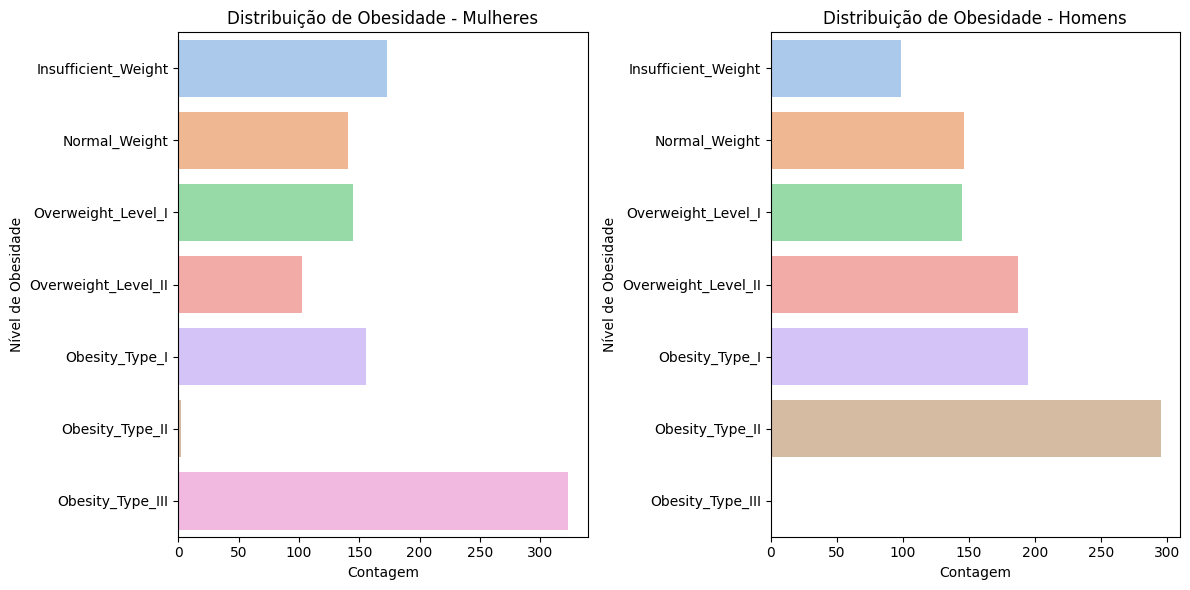

In [53]:
def plot_obesity_by_gender(df):
    plt.figure(figsize=(12, 6))
        
    plt.subplot(1, 2, 1) # Gráfico para mulheres
    sns.countplot(data=df[df['Gender'] == 'Female'], y='NObeyesdad', order=categorias, palette=cores)
    plt.title('Distribuição de Obesidade - Mulheres')
    plt.xlabel('Contagem')
    plt.ylabel('Nível de Obesidade')

    plt.subplot(1, 2, 2) # Gráfico para homens
    sns.countplot(data=df[df['Gender'] == 'Male'], y='NObeyesdad', order=categorias, palette=cores)
    plt.title('Distribuição de Obesidade - Homens')
    plt.xlabel('Contagem')
    plt.ylabel('Nível de Obesidade')

    plt.tight_layout()
    plt.show()
    
plot_obesity_by_gender(df)

A partir da análise da tabela de contagem e do gráfico de distribuição de obesidade por gênero, os principais insights obtidos são:

  - **Insuficiência de Peso**: As mulheres apresentam uma prevalência maior de insuficiência de peso (173 casos) em comparação aos homens (99 casos).

  - **Sobrepeso**: A distribuição de sobrepeso (Overweight) é semelhante entre homens e mulheres.

  - **Obesidade Tipo I e II**: Os homens apresentam uma prevalência maior de obesidade do tipo I (195 casos) e tipo II (295 casos) em relação às mulheres.

  - **Obesidade Tipo III**: Por outro lado, as mulheres têm uma prevalência muito maior de obesidade do tipo III (323 casos) em comparação aos homens (1 caso).

#### Esses resultados sugerem que existem diferenças de gênero na distribuição dos níveis de obesidade. Os homens parecem ser mais acometidos por formas "leves" de obesidade, enquanto as mulheres apresentam uma prevalência maior de obesidade mórbida (tipo III).  
#### Essa diferença de padrão pode estar relacionada a fatores biológicos, sociais e comportamentais que influenciam de maneira distinta a prevalência da obesidade em homens e mulheres. Compreender essas diferenças de gênero pode ser fundamental para o desenvolvimento de abordagens mais eficazes de prevenção e tratamento da obesidade.

### 3.3. Impacto do consumo do álcool e tabagismo na obesidade

Investigar a relação entre o consumo de álcool, tabagismo e os níveis de obesidade é relevante, pois o estilo de vida e os hábitos comportamentais podem influenciar significativamente a prevalência e gravidade da obesidade na população. Compreender essas associações pode fornecer insights importantes para o desenvolvimento de estratégias de prevenção e tratamento mais abrangentes e eficazes.

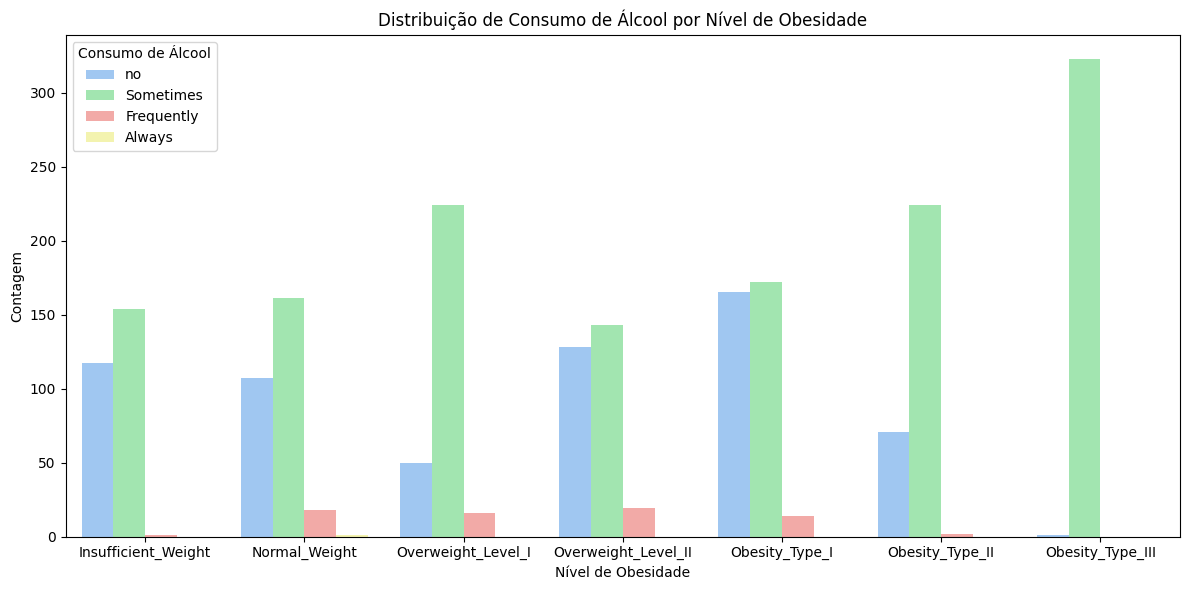

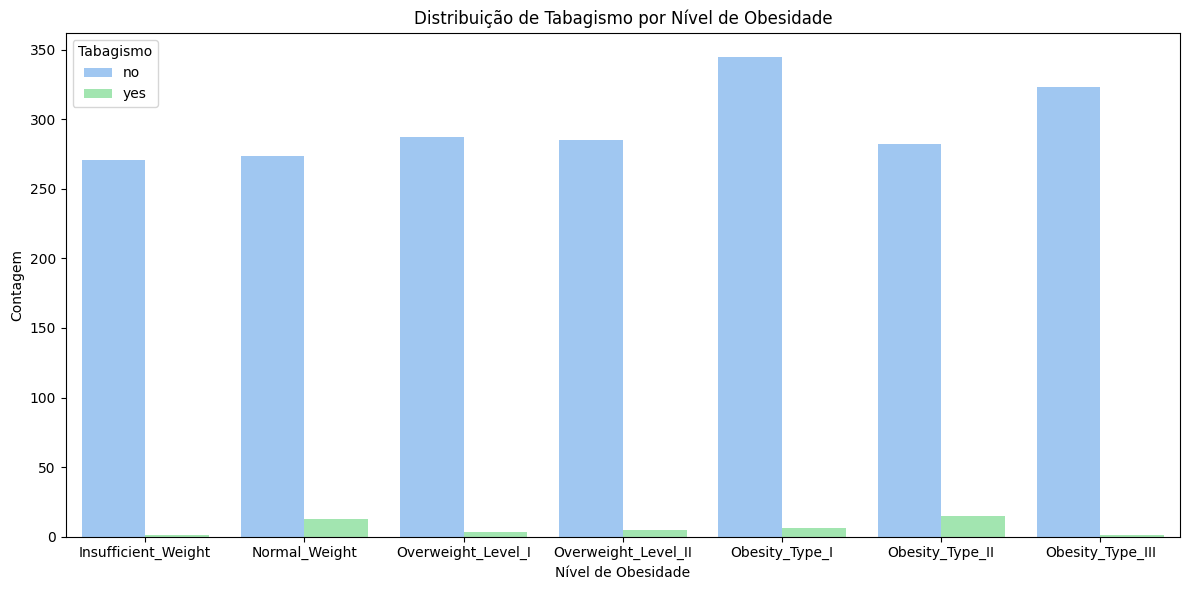

In [52]:
def plot_alcohol_smoking_obesity(df):
    paleta_pastel = ["#92c6ff", "#97f0aa", "#ff9f9a", "#fffea3", "#b0e0e6", "#ffb347", "#c7c7c7"]
    ordered_obesity_levels = [level for level in categorias if level in df['NObeyesdad'].unique()]

    plt.figure(figsize=(12, 6)) #Consumo de Álcool
    sns.countplot(data=df, x='NObeyesdad', hue='CALC', palette=paleta_pastel, order=ordered_obesity_levels)
    plt.title('Distribuição de Consumo de Álcool por Nível de Obesidade')
    plt.xlabel('Nível de Obesidade')
    plt.ylabel('Contagem')
    plt.legend(title='Consumo de Álcool')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6)) #Tabagismo
    sns.countplot(data=df, x='NObeyesdad', hue='SMOKE', palette=paleta_pastel, order=ordered_obesity_levels)
    plt.title('Distribuição de Tabagismo por Nível de Obesidade')
    plt.xlabel('Nível de Obesidade')
    plt.ylabel('Contagem')
    plt.legend(title='Tabagismo')
    plt.tight_layout()
    plt.show()

plot_alcohol_smoking_obesity(df)

In [32]:
stats = {
    'Consumo de Álcool': df['CALC'].describe(),
    'Tabagismo': df['SMOKE'].describe(),
    'Níveis de Obesidade': df['NObeyesdad'].describe()
}

for stat_name, stat_values in stats.items():
    print(f"Estatísticas descritivas para {stat_name}:")
    print(stat_values)
    print("\n")

Estatísticas descritivas para Consumo de Álcool:
count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object


Estatísticas descritivas para Tabagismo:
count     2111
unique       2
top         no
freq      2067
Name: SMOKE, dtype: object


Estatísticas descritivas para Níveis de Obesidade:
count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object




**Consumo de Álcool (CALC)**:

  - A categoria de consumo de álcool mais frequente é "Sometimes", com 1401 casos.
  - Existem 4 categorias distintas de consumo de álcool na amostra, indicando uma variabilidade no padrão de consumo.
  - A alta frequência da categoria "Sometimes" sugere que o consumo moderado de álcool é comum na população estudada.
  
**Tabagismo (SMOKE)**:

  - A maioria dos indivíduos (2067 casos) informou não fumar, representando a maior parte da amostra.
  - Há apenas 2 categorias de tabagismo (sim e não) na amostra, indicando que a variável é dicotômica.
  - O predomínio de não fumantes sugere que a população estudada apresenta um padrão de baixo consumo de cigarros.

**Níveis de Obesidade (NObeyesdad)**:

  - O nível de obesidade "Obesity_Type_I" é o mais prevalente, com 351 casos.
  - Existem 7 categorias distintas de níveis de obesidade na amostra, mostrando uma diversidade de graus de obesidade.
  - A alta frequência de "Obesity_Type_I" indica que esse é o nível de obesidade mais comum na população analisada.
  
#### Em geral, esses resultados fornecem um panorama inicial sobre o consumo de álcool, tabagismo e os níveis de obesidade na amostra. Eles sugerem que o consumo moderado de álcool e o predomínio de não fumantes são características marcantes dessa população, enquanto a obesidade do tipo I é a forma mais prevalente de excesso de peso.

### 3.4. Relação entre a altura, o peso e o nível de obesidade

Analisar a associação entre as medidas antropométricas, como altura e peso, e os diversos níveis de obesidade é fundamental para obter uma compreensão abrangente do perfil de saúde da população. Essa investigação permite identificar grupos vulneráveis ao excesso de peso, subsidiar o desenvolvimento de políticas e programas de saúde pública, e fornecer insights sobre os padrões nutricionais da amostra. Compreender como as características físicas se relacionam com a prevalência de diferentes graus de obesidade é essencial para direcionar ações de prevenção e promoção da saúde de forma mais eficaz e assertiva.

In [33]:
stats = {
    'Altura': df['Height'].describe(),
    'Peso': df['Weight'].describe(),
    'Níveis de Obesidade': df['NObeyesdad'].describe()
}

for stat_name, stat_values in stats.items():
    print(f"Estatísticas descritivas para {stat_name}:")
    print(stat_values)
    print("\n")

Estatísticas descritivas para Altura:
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64


Estatísticas descritivas para Peso:
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


Estatísticas descritivas para Níveis de Obesidade:
count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object




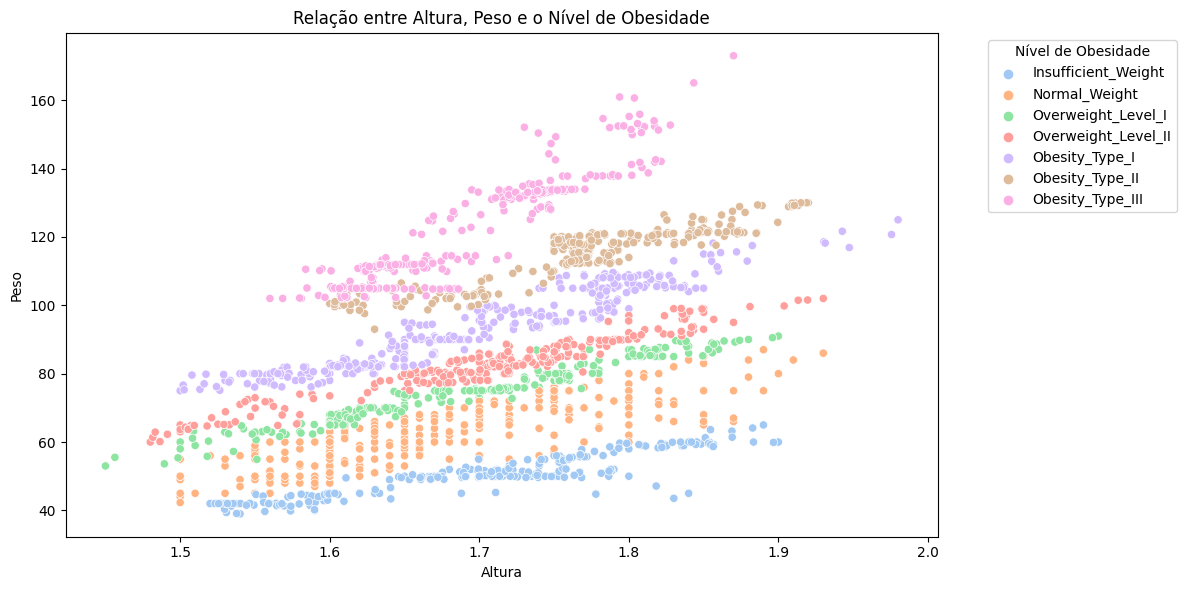

In [55]:
def plot_height_weight_obesity(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='pastel', hue_order=categorias)
    plt.title('Relação entre Altura, Peso e o Nível de Obesidade')
    plt.xlabel('Altura')
    plt.ylabel('Peso')
    plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_height_weight_obesity(df)

**Altura e Peso**:

  - A altura média da amostra é 1,70 metros, com um desvio-padrão de 93 milímetros (0,093 metros).
  - O peso médio da amostra é 86,59 kg, com um desvio-padrão de 26,19 kg.
  - Isso indica que há uma grande variabilidade tanto na altura quanto no peso dos indivíduos da amostra.

**Nível de Obesidade**:

  - A categoria mais frequente de nível de obesidade é "Obesity_Type_I", com 351 ocorrências.
  - Isso sugere que a obesidade do tipo I é a mais comum nesse conjunto de dados.

**Relação entre Altura, Peso e Obesidade**:

  - Embora não tenhamos informações sobre a correlação direta entre as variáveis, podemos inferir que, dado o alto desvio-padrão tanto na altura quanto no peso, há uma grande variabilidade na   - distribuição desses fatores na amostra.
  - Essa variabilidade pode se refletir nos diferentes níveis de obesidade observados, com a predominância da obesidade do tipo I.

In [98]:
def encode_categorical_variables(df):
    """
    Função para refatorar as variáveis categóricas 'NObeyesdad' e 'family_history_with_overweight' em números.

    Parâmetros:
    - df: DataFrame contendo os dados.

    Retorna:
    - df_encoded: DataFrame com as variáveis categóricas refatoradas em números.
    """
    df_encoded = df[['Height', 'Weight']].copy()
    df_encoded['NObeyesdad_encoded'] = pd.factorize(df['NObeyesdad'])[0]
    df_encoded['family_history_encoded'] = pd.factorize(df['family_history_with_overweight'])[0]
    return df_encoded

df_encoded = encode_categorical_variables(df)
print(df_encoded)

        Height      Weight  NObeyesdad_encoded  family_history_encoded
0     1.620000   64.000000                   0                       0
1     1.520000   56.000000                   0                       0
2     1.800000   77.000000                   0                       0
3     1.800000   87.000000                   1                       1
4     1.780000   89.800000                   2                       1
...        ...         ...                 ...                     ...
2106  1.710730  131.408528                   6                       0
2107  1.748584  133.742943                   6                       0
2108  1.752206  133.689352                   6                       0
2109  1.739450  133.346641                   6                       0
2110  1.738836  133.472641                   6                       0

[2111 rows x 4 columns]


In [72]:
def logistic_regression_model(df, features, target, test_size=0.2, random_state=42):
    """
    Função para treinar e avaliar um modelo de regressão logística.
    
    Parâmetros:
    - df: DataFrame contendo os dados.
    - features: Lista das colunas que serão usadas como variáveis independentes.
    - target: Nome da coluna que será usada como variável dependente.
    - test_size: Proporção dos dados a serem usados como conjunto de teste.
    - random_state: Semente aleatória para reprodutibilidade.
    
    Retorna:
    - Acurácia do modelo nos dados de teste.
    """
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train_scaled, y_train)


    accuracy = log_reg_model.score(X_test_scaled, y_test)
    return accuracy

features = ['Height', 'Weight']
target = 'NObeyesdad'
accuracy = logistic_regression_model(df, features, target)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.89


Uma acurácia de 0.89 significa que o modelo de regressão logística foi capaz de prever corretamente a classe de obesidade para 89% dos exemplos no conjunto de teste.
O modelo está capturando a relação entre altura, peso e nível de obesidade e usando-a efetivamente para fazer previsões. Isso sugere que altura e peso têm uma influência significativa no nível de obesidade.

In [77]:
def linear_regression_model(df, feature, target):
    """
    Função para criar, treinar e avaliar um modelo de regressão linear.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - feature: Nome da coluna que será usada como variável independente.
    - target: Nome da coluna que será usada como variável dependente.

    Retorna:
    - slope: Coeficiente de regressão.
    - intercept: Intercepto.
    - r_squared: Coeficiente de determinação (R²).
    """
    model = LinearRegression()

    model.fit(df[[feature]], df[target])

    slope = model.coef_[0]
    intercept = model.intercept_

    r_squared = model.score(df[[feature]], df[target])

    return slope, intercept, r_squared

slope, intercept, r_squared = linear_regression_model(df, 'Height', 'Weight')
print(f'Coeficiente de regressão (slope): {slope:.2f}')
print(f'Intercepto (intercept): {intercept:.2f}')
print(f'Coeficiente de determinação (R²): {r_squared:.2f}')

Coeficiente de regressão (slope): 130.00
Intercepto (intercept): -134.64
Coeficiente de determinação (R²): 0.21


**Coeficiente de regressão (slope): 130.00**  
Isso significa que, em média, para cada unidade de aumento na altura (em centímetros), o peso aumenta em aproximadamente 130.00 gramas.

**Intercepto (intercept): -134.64**  
Este é o valor estimado do peso quando a altura é zero. No contexto de altura e peso humanos, um intercepto negativo não tem uma interpretação prática direta, pois não faz sentido ter altura zero.

**Coeficiente de determinação (R²): 0.21**  
O coeficiente de determinação, ou R², indica o quanto a variação do peso é explicada pela variação na altura. Neste caso, aproximadamente 21% da variação no peso pode ser explicada pela variação na altura.

In [78]:
def calculate_correlation_matrix(df, feature_columns, target_column):
    """
    Função para calcular a matriz de correlação entre variáveis.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - feature_columns: Lista de nomes das colunas das variáveis independentes.
    - target_column: Nome da coluna da variável dependente.

    Retorna:
    - correlation_matrix: Matriz de correlação.
    """
    label_encoder = LabelEncoder()
    df[target_column + '_encoded'] = label_encoder.fit_transform(df[target_column])
    correlation_matrix = df[feature_columns + [target_column + '_encoded']].corr()
    return correlation_matrix

correlation_matrix = calculate_correlation_matrix(df, ['Height', 'Weight'], 'NObeyesdad')
display(correlation_matrix)

,Height,Weight,NObeyesdad_encoded
Height,1.000000,0.463136,0.038986
Weight,0.463136,1.000000,0.387643
NObeyesdad_encoded,0.038986,0.387643,1.000000


**Correlação entre Altura e Peso**:  
A correlação entre altura e peso é de aproximadamente 0.463. Isso indica uma correlação positiva moderada entre altura e peso. Ou seja, à medida que a altura aumenta, o peso tende a aumentar também, o que é uma relação esperada em dados antropométricos.

**Correlação entre Altura e Nível de Obesidade Codificado**:  
A correlação entre altura e o nível de obesidade codificado é muito baixa, com um valor de aproximadamente 0.039. Isso sugere que não há uma relação significativa entre altura e os níveis de obesidade conforme codificados neste conjunto de dados. Em outras palavras, a altura não está fortemente relacionada com os níveis de obesidade conforme representados pelos códigos atribuídos.

**Correlação entre Peso e Nível de Obesidade Codificado**:  
A correlação entre peso e o nível de obesidade codificado é moderada, com um valor de aproximadamente 0.388. Isso indica que existe uma relação moderada entre peso e os níveis de obesidade conforme codificados neste conjunto de dados. Em outras palavras, o peso está mais relacionado com os níveis de obesidade do que a altura, e à medida que o peso aumenta, os níveis de obesidade tendem a aumentar também

#### A altura está mais fortemente relacionada com o peso do que com os níveis de obesidade neste conjunto de dados. Além disso, o peso tem uma correlação moderada com os níveis de obesidade, enquanto a altura tem uma correlação muito fraca. Essas informações podem ajudar a orientar análises adicionais e decisões sobre os fatores que influenciam os níveis de obesidade.

### 3.5. Influência do histórico familiar na obesidade

In [79]:
def count_observation(df, column_name):
    contagem = df[column_name].value_counts()
    return contagem

contagem_historico = count_observation(df, 'family_history_with_overweight')
print("Contagem de observações para histórico familiar de sobrepeso:")
print(contagem_historico)

Contagem de observações para histórico familiar de sobrepeso:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


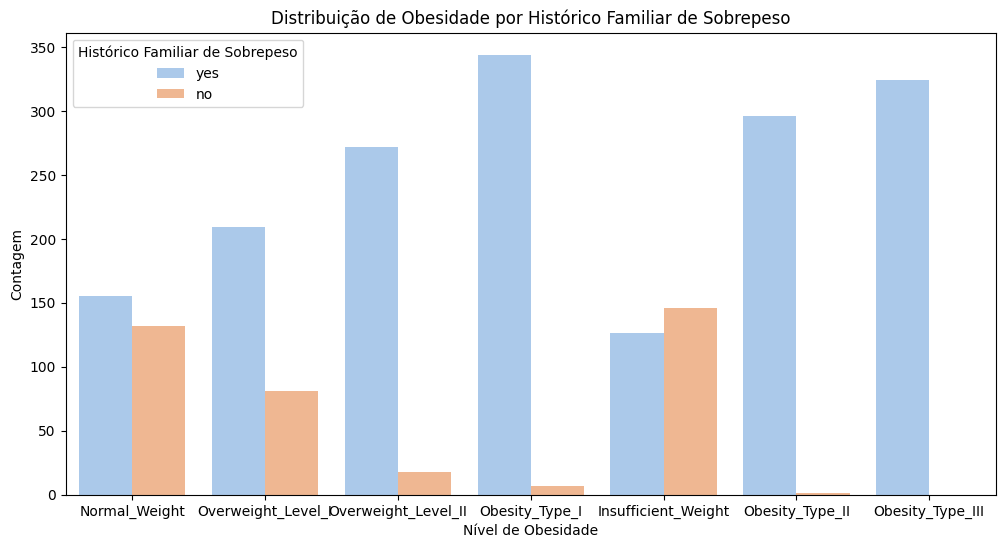

In [83]:
def plot_obesity_distribution(df, x_column, hue_column):
    paleta_pastel = sns.color_palette("pastel")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x_column, hue=hue_column, palette=paleta_pastel)
    plt.title('Distribuição de Obesidade por Histórico Familiar de Sobrepeso')
    plt.xlabel('Nível de Obesidade')
    plt.ylabel('Contagem')
    plt.legend(title='Histórico Familiar de Sobrepeso')
    plt.show()

plot_obesity_distribution(df, 'NObeyesdad', 'family_history_with_overweight')

In [85]:
def chi_squared_test(df, column1, column2):
    """
    Função para realizar o teste qui-quadrado entre duas variáveis categóricas.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - column1: Nome da primeira coluna para a tabela de contingência.
    - column2: Nome da segunda coluna para a tabela de contingência.

    Retorna:
    - chi2: Estatística Qui-quadrado.
    - p_value: Valor p do teste.
    """
    tabela_contingencia = pd.crosstab(df[column1], df[column2])
    chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)
    return chi2, p_valor

chi2, p_value = chi_squared_test(df, 'NObeyesdad', 'family_history_with_overweight')
print("Teste Qui-quadrado:")
print("Estatística Qui-quadrado:", chi2)
print("Valor-p:", p_value)

Teste Qui-quadrado:
Estatística Qui-quadrado: 621.9794353945298
Valor-p: 4.2280167944702657e-131


#### O teste Qui-quadrado foi utilizado para determinar se existe uma associação significativa entre a presença de histórico familiar de sobrepeso e os níveis de obesidade.  

**Estatística Qui-quadrado (chi2)**: O valor dessa estatística é 621.979. Esse valor representa a magnitude da diferença entre as frequências observadas na tabela de contingência (ou seja, as frequências reais de ocorrência das combinações das duas variáveis) e as frequências que seriam esperadas se as duas variáveis fossem independentes uma da outra. Quanto maior o valor da estatística qui-quadrado, maior a evidência de que há uma associação significativa entre as duas variáveis.  

**Valor p (p_valor)**: Este valor é aproximadamente 4.23e-131, o que significa 4.23 multiplicado por 10 elevado a -131. O valor p é a probabilidade de observar uma estatística qui-quadrado tão extrema quanto a observada, se a hipótese nula de independência entre as variáveis for verdadeira. Neste caso, um valor p muito baixo (próximo a zero) indica que é altamente improvável que a associação observada seja devido ao acaso. Ou seja, sugere fortemente que há uma associação significativa entre as variáveis.

#### Portando, com base nos resultados do teste qui-quadrado, podemos concluir que há uma associação estatisticamente significativa entre o histórico familiar de sobrepeso e o nível de obesidade. O valor extremamente baixo de p indica que é altamente improvável que a associação observada seja devido ao acaso, e a estatística qui-quadrado sugere que as frequências observadas diferem significativamente das esperadas sob a hipótese nula de independência.

In [99]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad', 'NObeyesdad_encoded'],
      dtype='object')

In [113]:
## Acurácia de 99,52%
## Não refatorei os dados em números
def logistic_regression_accuracy(df):
    """
    Função para treinar e avaliar um modelo de regressão logística.

    Parâmetros:
    - df: DataFrame contendo os dados.

    Retorna:
    - acuracia: Acurácia do modelo de regressão logística.
    """
    X = df.drop('NObeyesdad', axis=1)
    y = df['NObeyesdad']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_encoded = pd.get_dummies(X_train)
    X_test_encoded = pd.get_dummies(X_test)

    colunas_faltantes = set(X_train_encoded.columns) - set(X_test_encoded.columns)
    for coluna in colunas_faltantes:
        X_test_encoded[coluna] = 0
    X_test_encoded = X_test_encoded[X_train_encoded.columns]

    modelo = LogisticRegression(max_iter=7500)
    modelo.fit(X_train_encoded, y_train)

    acuracia = accuracy_score(y_test, modelo.predict(X_test_encoded))
    print("Acurácia do modelo de regressão logística:", acuracia_modelo_logistico)
    return acuracia

acuracia_modelo_logistico = logistic_regression_accuracy(df)

Acurácia do modelo de regressão logística: 0.9952718676122931


In [114]:
## Acurácia de 24,82%
## Dados refatorados *encoded*
def logistic_regression_updated_accuracy(df):
    """
    Função para treinar e avaliar um modelo de regressão logística.

    Parâmetros:
    - df: DataFrame contendo os dados.

    Retorna:
    - acuracia: Acurácia do modelo de regressão logística atualizado.
    """
    X = df[['family_history_encoded']]
    y = df['NObeyesdad_encoded']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo = LogisticRegression(max_iter=7500)
    modelo.fit(X_train, y_train)

    acuracia = accuracy_score(y_test, modelo.predict(X_test))
    print("Acurácia do modelo de regressão logística:", acuracia)
    return acuracia

acuracia_modelo_atualizado = logistic_regression_updated_accuracy(df_encoded)

Acurácia do modelo de regressão logística: 0.24822695035460993


Um modelo de regressão logística foi ajustado para prever a categoria de obesidade com base nas características individuais, incluindo o histórico familiar de sobrepeso.
O modelo foi treinado usando dados de treinamento e avaliado usando dados de teste, com uma alta acurácia de aproximadamente 99,53%.

#### Podemos concluir que o modelo de regressão logística está apresentando uma excelente capacidade de prever o nível de obesidade com base no histórico familiar. Isso sugere fortemente que o histórico familiar de sobrepeso tem uma influência significativa na probabilidade de uma pessoa estar em determinado nível de obesidade. É um fator relevante e importante na determinação do nível de obesidade.

### 3.6. Associação entre hábitos alimentares e obesidade

### 3.7. Correlação entre atividade física e obesidade

### 3.8. Correlação entre o tempo gasto em dispositivos tecnológicos e obesidade